# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Ingenium Canada Museum Collection](https://ingeniumcanada.org/centre/the-ingenium-research-institute) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [1]:
##Setup code to load in the dataset 
import numpy as np
file = open('data/museum_data_assignment-1.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset = np.array([x for x in dataset if not x[2] == "Unknown"])
dataset[:,2] = [int(x) for x in dataset[:,2]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]
dataset[:,7] = [float(x[:-2]) for x in dataset[:,7]]
dataset[:,8] = [float(x[:-2]) for x in dataset[:,8]]
dataset[:,5] = [x.replace(";","->").split("->")[0] for x in dataset[:,5]]
print("Column names\n")
print(headings)
print("\nDataset Shape\n")
print(dataset.shape)

Column names

['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material'
 'Length' 'Width' 'Height' 'image']

Dataset Shape

(6738, 10)


### Question 1

Using either ``sorted()`` or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=max#numpy.argmax), find and display the images for 

    - Oldest
    
    - Newest 
        
**You will have to do some extra research to find out how to display images in a Jupyter notebook**

In [2]:
import requests

In [3]:
from IPython.display import Image, display
from IPython.core.display import HTML 

In [4]:
years_in_dataset = dataset[:,2]
sorted_years = sorted(years_in_dataset)

oldest_year = sorted_years[1]
newest_year = sorted_years[-1]

for data in dataset:
    if data[2] == oldest_year:
        oldest_image_url = (data[9])

for data in dataset:
    if data[2] == newest_year:
        newest_image_url = (data[9])   

display(Image(url= oldest_image_url, width=300, unconfined=True))

display(Image(url= newest_image_url, width=300, unconfined=True))

### Question 2

Assuming the volume of an object is ``length x width x height``

1. Create a new 1-D array containing the volumes of each object 


2. Remove the **top and bottom 20%** (e.g. the biggest and smallest objects)


3. Plot a histogram of the remaining object's volumes. Label the axes appropriately.



In [5]:
#creating a 1D array containing the volumes of each object

length = dataset[:,6]
width = dataset[:,7]
height = dataset[:,8]

for data in dataset:
    volume = np.multiply(length, width, height)

print(volume)

[10200.0 4708.0 5750.0 ... 1010.5 42993.0 1484.05]


In [21]:
#removing the top and bottom 20% (biggest and smallest)

maximum = max(volume)
minimum = min(volume)

top_twenty = .8*maximum

bottom_twenty = .2*maximum

shorter_list = [i for i in volume if (i > bottom_twenty and i < top_twenty)]

print(shorter_list)

[6562100.0, 3683800.0, 10238799.999999998, 6181500.0, 6767000.0, 6954000.0]
6


In [23]:
import matplotlib.pyplot as plt

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 3683800.,  3902300.,  4120800.,  4339300.,  4557800.,  4776300.,
         4994800.,  5213300.,  5431800.,  5650300.,  5868800.,  6087300.,
         6305800.,  6524300.,  6742800.,  6961300.,  7179800.,  7398300.,
         7616800.,  7835300.,  8053800.,  8272300.,  8490800.,  8709300.,
         8927800.,  9146300.,  9364800.,  9583300.,  9801800., 10020300.,
        10238800.]),
 <BarContainer object of 30 artists>)

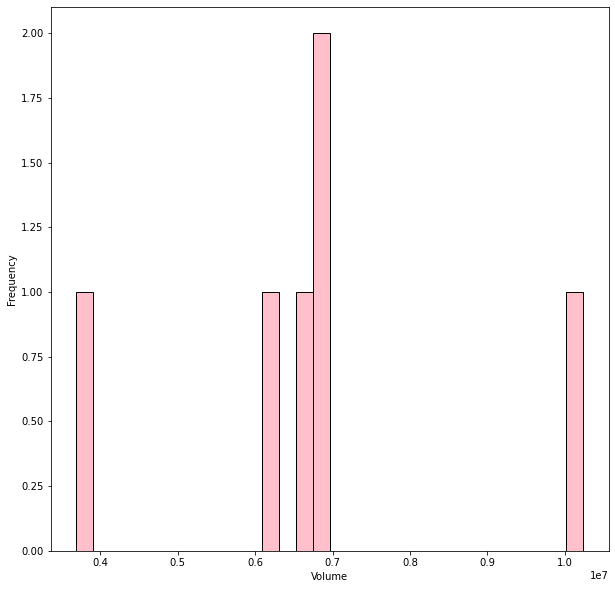

In [34]:
#plotting a histogram of the remaining object's volumes w/labelled axes
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("Volume")
ax.set_ylabel("Frequency")
plt.hist(shorter_list, bins=30, color='pink', edgecolor='black')

### Question 3 

What is the most common category and group? What percentage of the total items to they each make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?

In [9]:
from collections import Counter

In [10]:
#Finding the Category Information
length_of_data = len(dataset)

#accessing the category data
category = dataset[:,4]

#finding the most common Category
category_count = Counter(category)
average_category = category_count.most_common(1)
print("The average category is: ")
print(average_category)

The average category is: 
[('Still cameras', 695)]


In [11]:
#finding the percentage this category appears in the dataset
count_of_categories = 0
for cat in category:
    if cat == "Still cameras":
        count_of_categories +=1

percent_in_total = (count_of_categories/length_of_data) * 100
print(percent_in_total)

10.31463342238053


In [12]:
#Finding the Group Information

#accessing the group data
group = dataset[:,3]

#finding the most common Group
group_count = Counter(group)
average_group = group_count.most_common(1)
print("The average group is: ")
print(average_group)

The average group is: 
[('Technology', 2914)]


In [13]:
#finding the percentage this group appears in the dataset
count_of_group = 0
for g in group:
    if g == "Technology":
        count_of_group +=1

percent_of_group = (count_of_group/length_of_data) * 100
print(percent_of_group)

43.247254378153755


### Question 4

1. Plot date of objects against width from everything added to the collection between 1850 and 1900. Pick sensible ticks and labels for the axes, as well as a sensible scale.

Each item on the plot should have a different colour or symbol depending on its material as described by the ``material`` heading .**EXTRA BONUS** If you can put in a legend mapping material to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, width and material. You can add some extra plots if you think it will help support any of your points. 


In [54]:
#finding the full dataset between 1850 and 1900
new_dataset = dataset[(dataset[:,2] > 1850) & (dataset[:,2] < 1900)]

#finding a list of all materials then sorting the datasets by material
materials = new_dataset[:,5]

list_of_materials = []
for m in materials:
    if m not in list_of_materials:
        list_of_materials.append(m)

metal_dates = []
metal_widths = []

wood_dates = []
wood_widths = []

paper_dates = []
paper_widths = []

Unknown_dates = []
Unknown_widths = []

fibre_dates = []
fibre_widths = []

glass_dates = []
glass_widths = []

skin_dates = []
skin_widths = []

synthetic_dates = []
synthetic_widths = []

stone_dates = []
stone_widths = []

resin_dates = []
resin_widths = []

for new in new_dataset:
    if new[5] == "metal":
        metal_dates.append(new[2])
        metal_widths.append(new[7])
    elif new[5] == "wood":
        wood_dates.append(new[2])
        wood_widths.append(new[7])
    elif new[5] == "paper":
        paper_dates.append(new[2])
        paper_widths.append(new[7])
    elif new[5] == "Unknown":
        Unknown_dates.append(new[2])
        Unknown_widths.append(new[7])
    elif new[5] == "fibre":
        fibre_dates.append(new[2])
        fibre_widths.append(new[7])
    elif new[5] == "glass":
        glass_dates.append(new[2])
        glass_widths.append(new[7])
    elif new[5] == "skin":
        skin_dates.append(new[2])
        skin_widths.append(new[7])
    elif new[5] == "synthetic":
        synthetic_dates.append(new[2])
        synthetic_widths.append(new[7])
    elif new[5] == "stone":
        stone_dates.append(new[2])
        stone_widths.append(new[7])
    elif new[5] == "resin":
        resin_dates.append(new[2])
        resin_widths.append(new[7])

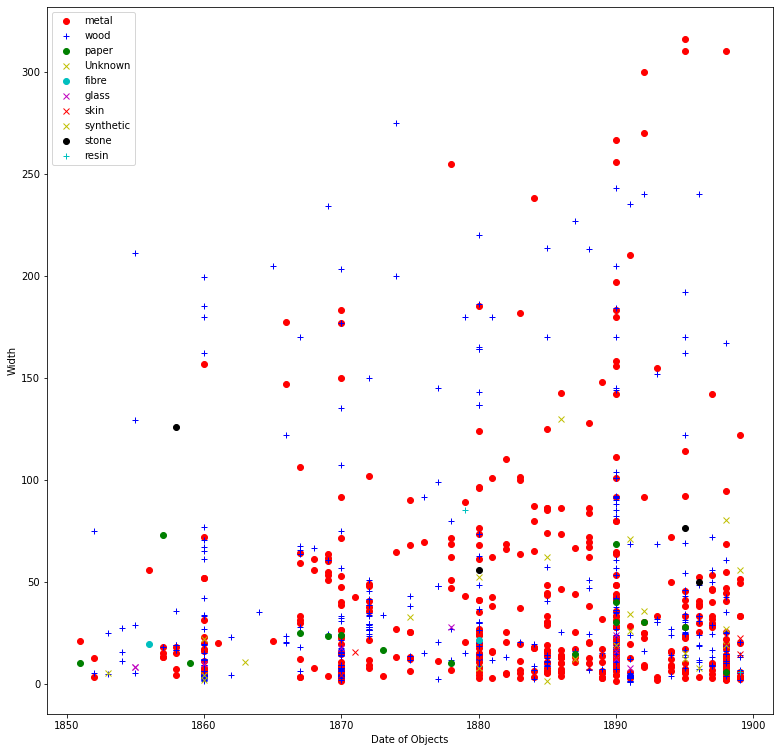

In [61]:
#creating the plot parameters
fig, ax = plt.subplots(figsize=(13,13))
ax.set_xlabel("Date of Objects")
ax.set_ylabel("Width")

#plotting the data
ax.plot(metal_dates, metal_widths, "ro", label="metal")
ax.plot(wood_dates, wood_widths, "b+", label="wood")
ax.plot(paper_dates, paper_widths, "go", label="paper")
ax.plot(Unknown_dates, Unknown_widths, "yx", label="Unknown")
ax.plot(fibre_dates, fibre_widths, "co", label="fibre")
ax.plot(glass_dates, glass_widths, "mx", label="glass")
ax.plot(skin_dates, skin_widths, "rx", label="skin")
ax.plot(synthetic_dates, synthetic_widths, "yx", label="synthetic")
ax.plot(stone_dates, stone_widths, "ko", label="stone")
ax.plot(resin_dates, resin_widths, "c+", label="resin")

plt.legend(loc="upper left")